In [61]:
import numpy as np
import matplotlib.pyplot as plt

### выборка

In [62]:
N = 25
np.random.seed(47)
X = np.around(np.log(1/(1-np.random.random_sample(N))), decimals = 3)
X                         

array([0.12 , 3.668, 1.305, 0.433, 1.23 , 1.607, 1.037, 0.535, 1.224,
       0.283, 0.296, 0.024, 0.104, 0.357, 1.024, 0.389, 0.205, 2.491,
       0.316, 0.32 , 3.088, 0.136, 1.375, 0.005, 1.943])

### вариационный ряд

In [63]:
X1 = np.sort(X)
X1

array([0.005, 0.024, 0.104, 0.12 , 0.136, 0.205, 0.283, 0.296, 0.316,
       0.32 , 0.357, 0.389, 0.433, 0.535, 1.024, 1.037, 1.224, 1.23 ,
       1.305, 1.375, 1.607, 1.943, 2.491, 3.088, 3.668])

### мода, медиана, размах

In [64]:
print('размах = ',  X1[N-1] - X1[0])
print('медиана = ',  X1[13])
print('мода = ',  X1)

размах =  3.6630000000000003
медиана =  0.535
мода =  [0.005 0.024 0.104 0.12  0.136 0.205 0.283 0.296 0.316 0.32  0.357 0.389
 0.433 0.535 1.024 1.037 1.224 1.23  1.305 1.375 1.607 1.943 2.491 3.088
 3.668]


### Эмпирическая функция

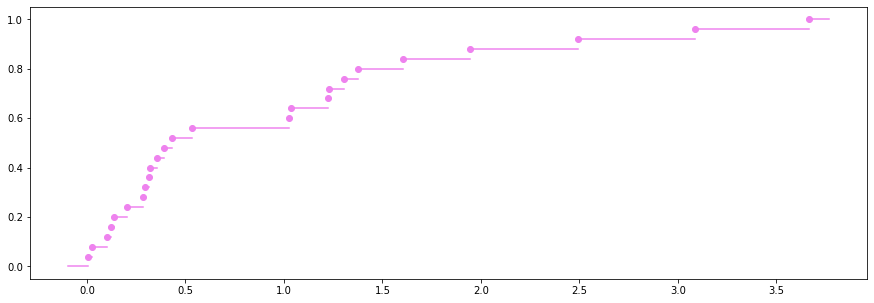

In [65]:
fig, ax = plt.subplots(figsize = (15, 5))
plt.plot([X1[0]-0.1, X1[0]], [0, 0], color = "violet")
for i in range(N-1):
    plt.plot(X1[i:i+2], [(i + 1) / N]*2, color = "violet")
plt.plot([X1[-1], X1[-1] + 0.1], [1,1], color = "violet")
plt.scatter(X1, [i / N for i in range(1, 26)], color = 'violet')
plt.show()

###  Гистограмма

In [66]:
k = 5
h = list(np.histogram(X1, bins = k))
h[0] = h[0]/N/k
h[1] = np.delete(h[1], 0)
h

[array([0.112, 0.048, 0.016, 0.008, 0.016]),
 array([0.7376, 1.4702, 2.2028, 2.9354, 3.668 ])]

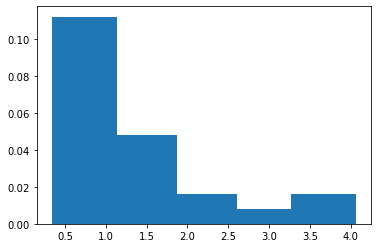

In [67]:
fig, ax = plt.subplots()
ax.bar(h[1], h[0])
None

### Boxplot

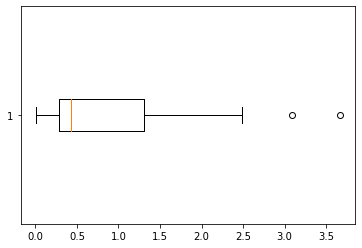

In [68]:
plt.boxplot(X1, vert = False)
None

### ЯОП

In [69]:
h = 2.344/3*np.sqrt(np.sum((X-1/N*np.sum(X))**2))/(N**0.2)
h

1.9842492068662148

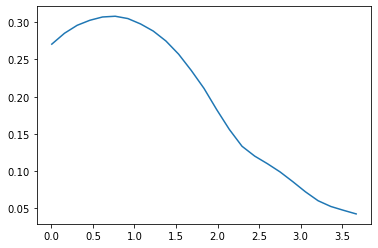

In [70]:
def q(z):
    return 0.75*(1 - z**2)
def p(z):
    return 1/(25*h)*np.sum([(q((z - i)/h) if q((z - i)/h) > 0 else 0) for i in X])
x = np.linspace(X1[0], X1[-1], 25)
plt.plot(x, [p(i) for i in x])

### Плотность распределения ср. арифм.

In [71]:
from scipy.stats import moment
from random import choice
def bootstrap(X, func):
    np.random.seed(42)
    M = np.array([])
    for i in range(1000):
        x = np.array([])
        for i in range(10):
            x = np.append(x, choice(X))
        M = np.append(M, func(x))
    return M  
M = bootstrap(X1, np.mean)

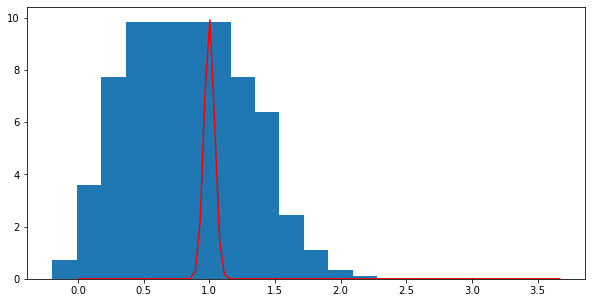

In [72]:
from scipy.stats import norm
x = np.linspace(X1[0], X1[-1], 100)
fig, ax = plt.subplots(1, figsize = (10, 5))
h = list(np.histogram(M))
h[0] = h[0]/N
h[1] = np.delete(h[1], -1)
ax.bar(h[1], h[0])
ax.plot(x, norm.pdf(x, loc = 1, scale = 0.04), color = 'red')

### Bootstrap

In [73]:
def gamma (x):
    return (moment(x, 3)/(moment(x, 2)**1.5))
M = bootstrap(X1, gamma)

<BarContainer object of 10 artists>

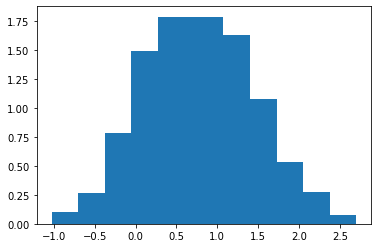

In [74]:
h = list(np.histogram(M))
h[0] = h[0]/N/k
h[1] = np.delete(h[1], -1)
fig, ax = plt.subplots()
ax.bar(h[1], h[0])